<a href="https://colab.research.google.com/github/GenoKiller777/Visualizaciones/blob/main/CasoSuperstore_DarwinJoanPerezAvendano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Superstore.csv to Superstore.csv
User uploaded file "Superstore.csv" with length 2287806 bytes


# Caso Superstore

In [56]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Superstore.csv', encoding='windows-1252')

In [8]:
df.shape

(9994, 21)

In [9]:
df.head(4).T

,0,1,2,3
Row ID,1,2,3,4
Order ID,CA-2016-152156,CA-2016-152156,CA-2016-138688,US-2015-108966
Order Date,11/8/2016,11/8/2016,6/12/2016,10/11/2015
Ship Date,11/11/2016,11/11/2016,6/16/2016,10/18/2015
Ship Mode,Second Class,Second Class,Second Class,Standard Class
Customer ID,CG-12520,CG-12520,DV-13045,SO-20335
Customer Name,Claire Gute,Claire Gute,Darrin Van Huff,Sean O'Donnell
Segment,Consumer,Consumer,Corporate,Consumer
Country,United States,United States,United States,United States
City,Henderson,Henderson,Los Angeles,Fort Lauderdale


In [36]:
df2 = df[["Order Date","Ship Date","Ship Mode","Customer Name","Segment","City","State","Region","Category",
          "Sub-Category","Product Name","Sales","Quantity","Discount","Profit"]]

In [37]:
df2

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/21/2014,1/23/2014,Second Class,Tom Boeckenhauer,Consumer,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,2/26/2017,3/3/2017,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,2/26/2017,3/3/2017,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,2/26/2017,3/3/2017,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [92]:
df2_linea = df2[['Order Date','Sales','Profit']]
df2_linea['Order Date'] = pd.to_datetime(df2_linea['Order Date'])

df.reset_index(inplace=True)

# Create new columns
df2_linea['day'] = df2_linea['Order Date'].dt.day
df2_linea['month'] = df2_linea['Order Date'].dt.month
df2_linea['Year'] = df2_linea['Order Date'].dt.year


<Axes: xlabel='Year', ylabel='Profit'>

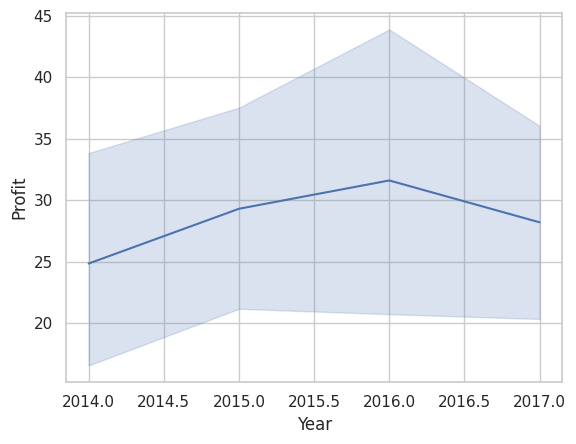

In [95]:
sns.lineplot(data = df2_linea, x="Year", y="Profit")

<Axes: xlabel='Year', ylabel='Sales'>

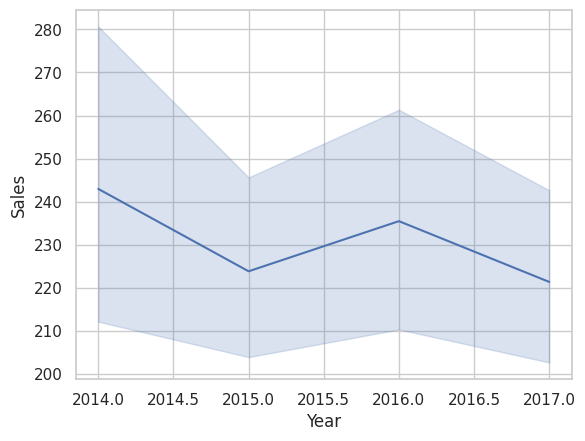

In [96]:
sns.lineplot(data = df2_linea, x="Year", y="Sales")

In [73]:
df2['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [32]:
df2['Customer Name'].value_counts()

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: Customer Name, Length: 793, dtype: int64

In [33]:
df2['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [38]:
df2['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [34]:
df2['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [ ]:
df2.info()

In [ ]:
df2['City'] = df2['City'].astype('category')
df2['Order Date'] = pd.to_datetime(df2['Order Date'])
df2['Sales'] = pd.to_numeric(df2['Sales'])

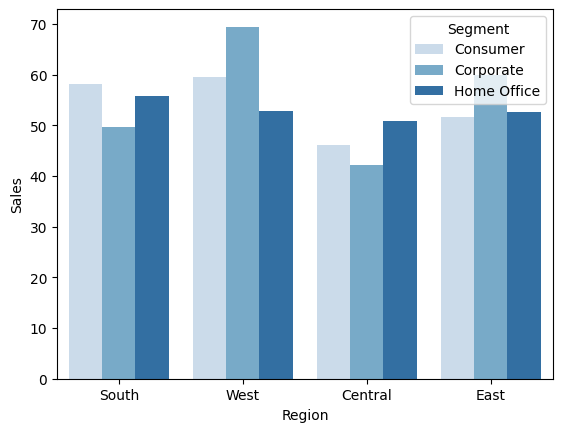

In [58]:
import warnings
warnings.filterwarnings("ignore")

sns.barplot(
    data=df2,
    x="Region", y="Sales", hue="Segment", palette = "Blues",estimator = np.median, ci = 0)

plt.show()

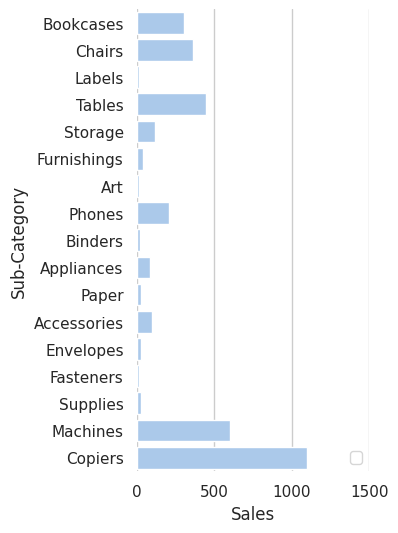

In [72]:
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(3, 6))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Sales", y="Sub-Category", data=df2,
             color="b",estimator = np.median, ci = 0)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1500), ylabel="Sub-Category",
       xlabel="Sales")
sns.despine(left=True, bottom=True)

# **Infografía** _de SuperStore_

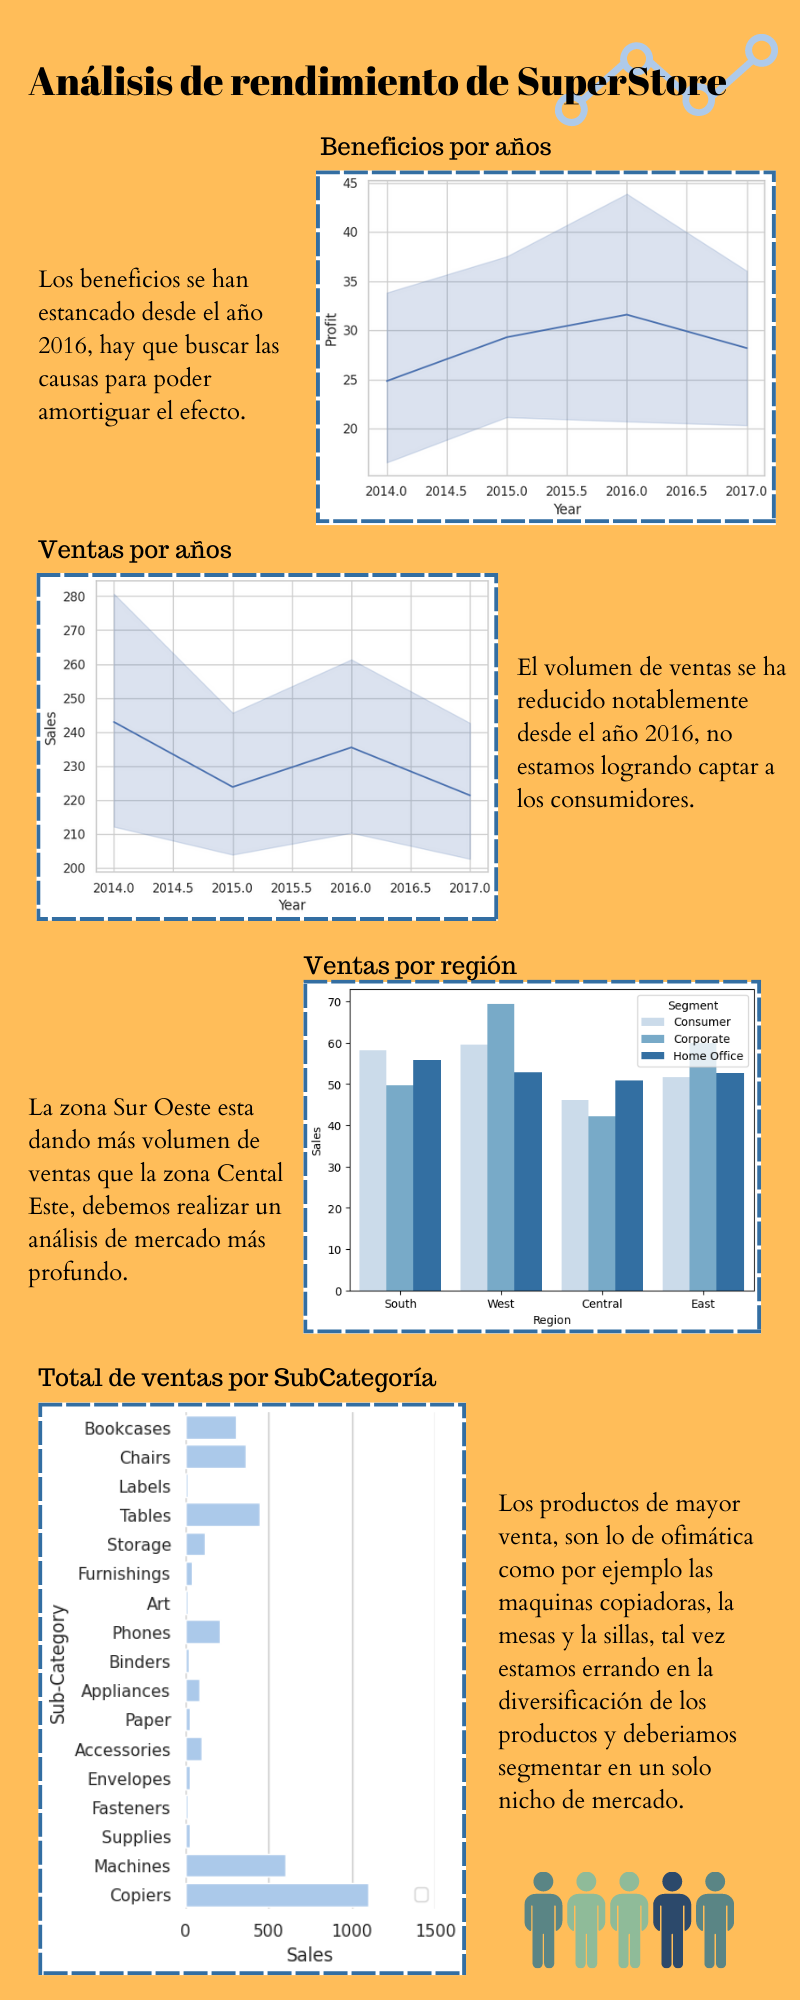